In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\HELLO\Desktop\bank-additional-full.csv")
data_age = data['age'].value_counts().rename_axis('age').reset_index(name='count')
df = data.groupby('y').get_group('yes')
df

,age,job,marital,education,credit default,housing loan,personal loan,contact,month,day_of_week,...,campaign,past days,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.mean()

age                 40.913147
duration (s)       553.191164
campaign             2.051724
past days          792.035560
previous             0.492672
emp.var.rate        -1.233448
cons.price.idx      93.354386
cons.conf.idx      -39.789784
euribor3m            2.123135
nr.employed       5095.115991
dtype: float64

                                SUBSCRIBER'S DESCRIPTION AND INSIGHTS
                             

In [4]:
# AGE ANALYTICS

In [5]:
df_age = df['age'].value_counts().rename_axis('age').reset_index(name='count')
df_age

,age,count
0,31,220
1,33,210
2,30,202
3,29,186
4,32,184
...,...,...
70,92,3
71,89,2
72,17,2
73,98,2


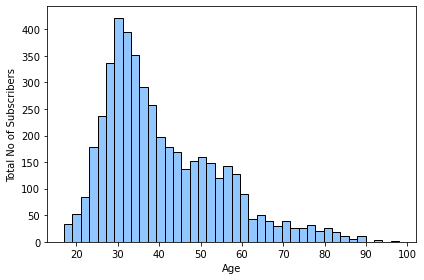

In [6]:
pyplot.style.use('seaborn-pastel')
pyplot.xlabel('Age')
pyplot.ylabel('Total No of Subscribers')
pyplot.hist(df['age'], bins = 40, edgecolor = 'black')
pyplot.tight_layout()

In [7]:
total_subs = df_age['count'].sum()
df_age['% of Subscribers'] = (df_age['count']/total_subs)*100
df_age

,age,count,% of Subscribers
0,31,220,4.741379
1,33,210,4.525862
2,30,202,4.353448
3,29,186,4.008621
4,32,184,3.965517
...,...,...,...
70,92,3,0.064655
71,89,2,0.043103
72,17,2,0.043103
73,98,2,0.043103


In [8]:
df_age['% of Subscribers'].head(10).sum()
# Insight 1: 38.8% Subscribers are in the age group of (29 to 39)

38.814655172413794

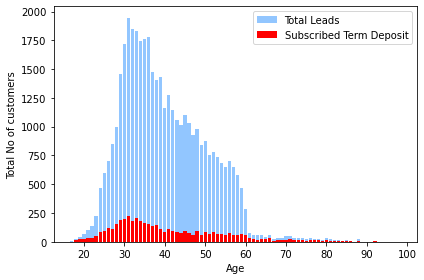

In [9]:
pyplot.style.use('seaborn-pastel')
pyplot.xlabel('Age')
pyplot.ylabel('Total No of customers')
pyplot.bar(data_age['age'], data_age['count'], label = "Total Leads")
pyplot.bar(df_age['age'], df_age['count'], color = 'red', label = "Subscribed Term Deposit")
pyplot.legend()
pyplot.tight_layout()

# Insight 2: People in the age range of (30-35) are targeted maximum.

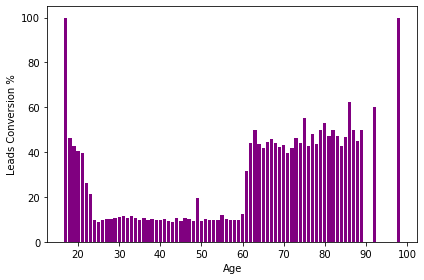

In [10]:
df_age['Leads Conversion %'] = (df_age['count']/data_age['count'])*100
pyplot.bar(df_age['age'], df_age['Leads Conversion %'], color = 'purple')
pyplot.xlabel('Age')
pyplot.ylabel('Leads Conversion %')
pyplot.tight_layout()
# Insight 3: In the age (60-80), the Leads conversion rate is 4x as compared to age (30-60)

In [11]:
# JOB ANALYTICS

In [12]:
df_job = df['job'].value_counts()
df_job = df_job.rename_axis("job").reset_index(name = "No of Subscribers")
df_job

,job,No of Subscribers
0,admin.,1352
1,technician,730
2,blue-collar,638
3,retired,434
4,management,328
5,services,323
6,student,275
7,self-employed,149
8,unemployed,144
9,entrepreneur,124


In [13]:
data_job = data['job'].value_counts().rename_axis('job').reset_index(name='count')
data_job

,job,count
0,admin.,10422
1,blue-collar,9254
2,technician,6743
3,services,3969
4,management,2924
5,retired,1720
6,entrepreneur,1456
7,self-employed,1421
8,housemaid,1060
9,unemployed,1014


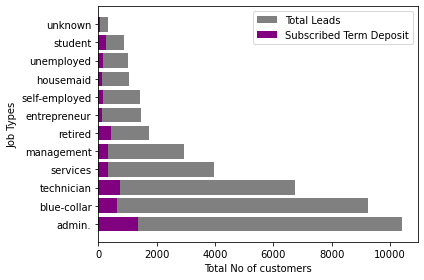

In [14]:
pyplot.style.use('seaborn-pastel')
pyplot.ylabel('Job Types')
pyplot.xlabel('Total No of customers')
pyplot.barh(data_job['job'], data_job['count'], label = "Total Leads", color = 'grey')
pyplot.barh(df_job['job'], df_job['No of Subscribers'], color = 'purple', label = "Subscribed Term Deposit")
pyplot.legend()
pyplot.tight_layout()

# Insight 4: People who work in Administration, technician and Blue-collor jobs subscribe to term deposit the most. 
# Insight 5: People who are students, unemployed or housemaid subscribe to term deposit the least. 

In [15]:
# MARITAL STATUS ANALYTICS

In [16]:
df['marital'].unique()

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

In [17]:
df_marital = df['marital'].value_counts().rename_axis("Marital Status").reset_index(name = "No of Subscribers")
df_marital = df_marital.drop([3], axis = 0)
df_marital

,Marital Status,No of Subscribers
0,married,2532
1,single,1620
2,divorced,476


In [18]:
data_marital = data['marital'].value_counts().rename_axis("Marital Status").reset_index(name = "No of Customers")
data_marital = data_marital.drop([3], axis = 0)
data_marital

,Marital Status,No of Customers
0,married,24928
1,single,11568
2,divorced,4612


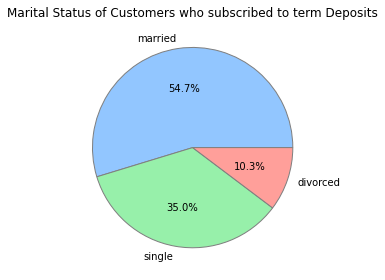

In [19]:
pyplot.pie(df_marital['No of Subscribers'], labels = df_marital['Marital Status'], 
           wedgeprops = {'edgecolor' : 'grey'}, autopct = '%1.1f%%')
pyplot.title("Marital Status of Customers who subscribed to term Deposits")
pyplot.tight_layout()

In [20]:
df_marital['Leads Conversion'] = df_marital['No of Subscribers']/data_marital['No of Customers']*100
df_marital
# Insight 6: Single people tend to subscribe term deposit the most. 

,Marital Status,No of Subscribers,Leads Conversion
0,married,2532,10.157253
1,single,1620,14.004149
2,divorced,476,10.320902


In [21]:
# EDUCATIONAL STATUS ANALYTICS

In [22]:
df_ed = df['education'].value_counts().rename_axis('Education Level').reset_index(name = 'No of Subscribers')
df_ed

,Education Level,No of Subscribers
0,university.degree,1670
1,high.school,1031
2,professional.course,595
3,basic.9y,473
4,basic.4y,428
5,unknown,251
6,basic.6y,188
7,illiterate,4


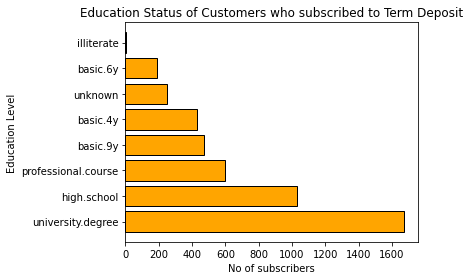

In [23]:
pyplot.barh(df_ed['Education Level'],df_ed['No of Subscribers'] , edgecolor = 'black', color = 'orange')
pyplot.ylabel('Education Level')
pyplot.xlabel('No of subscribers')
pyplot.title("Education Status of Customers who subscribed to Term Deposit")
pyplot.tight_layout()

# Insight 7: Well Educated people who have either University degree or went High school or have enrolled in professional course subscribe term deposits the most

In [24]:
# CREDIT DEFAULTS ANALYTICS

In [25]:
df_cd = df['credit default'].value_counts().rename_axis('credit default status').reset_index(name = 'No of Subscribers')
df_cd
# Insight 8: All of the Customers who have subscribed term deposit have not defaulted on credit.

,credit default status,No of Subscribers
0,no,4197
1,unknown,443


In [26]:
# HOME LOAN AND PERSONAL LOAN ANALYTICS housing loan	personal loan

In [27]:
df_hl = df['housing loan'].value_counts().rename_axis('Housing Loan Status').reset_index(name = 'No of Subscribers')
df_hl = df_hl.drop([2], axis = 0)
df_hl['% of Subscribers'] = df_hl['No of Subscribers']/total_subs*100
df_hl
# Insight 9: Approximately half of the customers have a home loan on them.

,Housing Loan Status,No of Subscribers,% of Subscribers
0,yes,2507,54.030172
1,no,2026,43.663793


In [28]:
df_pl = df['personal loan'].value_counts().rename_axis('personal loan status').reset_index(name = 'No of Subscribers')
df_pl = df_pl.drop([2], axis = 0)
df_pl['% of Subscribers'] = df_pl['No of Subscribers']/total_subs*100
df_pl
# Insight 10: Only 15% of customers have personal loan on them.

,personal loan status,No of Subscribers,% of Subscribers
0,no,3850,82.974138
1,yes,683,14.719828


In [29]:
# NO OF TIMES CONTACTED & DURATION ANALYTICS

In [30]:
# All the values in minutes.
df_dur = df['duration (s)']/60
df_dur.describe()

# Insight 11: Average duration per call for customers who subscribe to term deposit is 9.2 minutes, maximum call duration is 70 mins and minimum is 36 sec.

count    4640.000000
mean        9.219853
std         6.686198
min         0.616667
25%         4.216667
50%         7.483333
75%        12.354167
max        69.983333
Name: duration (s), dtype: float64

In [31]:
df['campaign '].describe()

count    4640.000000
mean        2.051724
std         1.666245
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        23.000000
Name: campaign , dtype: float64

In [32]:
df_cam = df['campaign '].value_counts().rename_axis('No of times Contacted').reset_index(name = 'No of Subscribers')
df_cam['% of Subscribers'] = df_cam['No of Subscribers']/total_subs*100
df_cam

# Insight 12: 50% of the customers subscribed within 1 contact and 88% of customers subscribed within 3 contacts during the campaign during the campaign for term deposit subscription.

,No of times Contacted,No of Subscribers,% of Subscribers
0,1,2300,49.568966
1,2,1211,26.099138
2,3,574,12.370690
3,4,249,5.366379
4,5,120,2.586207
5,6,75,1.616379
6,7,38,0.818966
7,9,17,0.366379
8,8,17,0.366379
9,10,12,0.258621


In [33]:
df['poutcome'].value_counts()

nonexistent    3141
success         894
failure         605
Name: poutcome, dtype: int64

In [34]:
#   emp.var.rate: employment variation rate - quarterly indicator (numeric)
#   cons.price.idx: consumer price index - monthly indicator (numeric)     
#   cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
#   euribor3m: euribor 3 month rate - daily indicator (numeric)
#   nr.employed: number of employees - quarterly indicator (numeric)

In [35]:
# INDICATORS ANALYTICS

In [36]:
df['emp.var.rate'].describe()

count    4640.000000
mean       -1.233448
std         1.623626
min        -3.400000
25%        -1.800000
50%        -1.800000
75%        -0.100000
max         1.400000
Name: emp.var.rate, dtype: float64

In [37]:
df['cons.price.idx'].describe()

count    4640.000000
mean       93.354386
std         0.676644
min        92.201000
25%        92.893000
50%        93.200000
75%        93.918000
max        94.767000
Name: cons.price.idx, dtype: float64

In [38]:
df['cons.conf.idx'].describe()

count    4640.000000
mean      -39.789784
std         6.139668
min       -50.800000
25%       -46.200000
50%       -40.400000
75%       -36.100000
max       -26.900000
Name: cons.conf.idx, dtype: float64

In [39]:
df['euribor3m'].describe()

count    4640.000000
mean        2.123135
std         1.742598
min         0.634000
25%         0.849000
50%         1.266000
75%         4.406000
max         5.045000
Name: euribor3m, dtype: float64

In [40]:
df['nr.employed'].describe()

count    4640.000000
mean     5095.115991
std        87.572641
min      4963.600000
25%      5017.500000
50%      5099.100000
75%      5191.000000
max      5228.100000
Name: nr.employed, dtype: float64

                                        INSIGHTS SUMMARY
1: 38.8% Subscribers are in the age group of (29 to 39)

2: People in the age range of (30-35) are targeted maximum.

3: In the age (60-80), the Leads conversion rate is 4x as compared to age (30-60)

4: People who work in Administration, technician and Blue-collor jobs subscribe to term deposit the most. 

5: People who are students, unemployed or housemaid subscribe to term deposit the least. 

6: Single people tend to subscribe term deposit the most. 

7: Well Educated people who have either University degree or went High school or have enrolled in professional course subscribe term deposits the most.

8: All of the Customers who have subscribed term deposit have not defaulted on credit.

9: Approximately half of the customers have a home loan on them.

10: Only 15% of customers have personal loan on them.

11: Average duration per call for customers who subscribe to term deposit is 9.2 minutes, maximum call duration is 70 mins and minimum is 36 sec.

12: 50% of the customers subscribed within 1 contact and 88% of customers subscribed within 3 contacts during the campaign during the campaign for term deposit subscription.


                                    THANK YOU!